## A - Data Import, resampling  and merging

(1) Data losses

In [1]:
import pandas as pd
import datetime as dt

df = pd.read_csv("../../data/Avtice-losses.csv", header = 1, parse_dates = ["Zeitstempel"])
df["Zeitstempel"] = df["Zeitstempel"] - dt.timedelta(minutes=15)
df = df.groupby("Zeitstempel", as_index=False).kWh.mean()
df = df.resample("H", on = "Zeitstempel").sum().reset_index()
data_loss = df

(2) Renewable Generation

In [2]:
data_renewable_generation = pd.read_csv("../../data/Forecast-renewable-generation.csv", header = 0, parse_dates = ["datetime"])
data_renewable_generation = data_renewable_generation.groupby("datetime", as_index=False)[[col for col in data_renewable_generation.columns]].mean()
#data_renewable_generation

(3) NTC

In [3]:
data_NTC = pd.read_csv("../../data/NTC.csv", header = 0, parse_dates = ["datetime"])
data_NTC = data_NTC.groupby("datetime", as_index=False)[[col for col in data_NTC.columns]].mean()
#data_NTC

(4) Temperatures

In [4]:
df = pd.read_csv("../../data/Forecast-temperature_new.csv", header = 0)

df['datetime'] = pd.to_datetime(df['datetime'])
start_time = '2019-01-01 01:00'
end_time = '2021-12-31 23:00'
hourly_range = pd.date_range(start=start_time, end=end_time, freq='H')
df_resampled = pd.DataFrame({'datetime': hourly_range})
df_resampled = df_resampled.merge(df, on="datetime", how='left')
df_resampled.interpolate(inplace=True, fill_value='extrapolate')
data_temperatures = df_resampled
#data_temperatures

(5) Joins

In [5]:
data = data_temperatures.set_index("datetime")
data = data.join(data_renewable_generation.set_index("datetime"))
data = data.join(data_NTC.set_index("datetime"))
data = data.join(data_loss.set_index("Zeitstempel"))

In [6]:
data

,temperature_fore_ch,temperature_fore_fr,temperature_fore_de,temperature_fore_it,solar_fore_de [MW],solar_fore_it [MW],wind_fore_de [MW],wind_fore_it [MW],CH_AT,CH_DE,CH_FR,CH_IT,AT_CH,DE_CH,FR_CH,IT_CH,kWh
2019-01-01 01:00:00,4.1067,5.972900,7.426800,4.028100,0.0,0.0,23052.3310,4596.5916,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0,129716.036003
2019-01-01 02:00:00,3.7155,5.900717,7.246083,3.811433,0.0,0.0,24969.9701,4478.5564,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0,133398.074458
2019-01-01 03:00:00,3.3243,5.828533,7.065367,3.594767,0.0,0.0,27082.9626,4323.3712,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0,135133.851731
2019-01-01 04:00:00,2.9331,5.756350,6.884650,3.378100,0.0,0.0,26890.9717,4231.8283,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0,131699.424059
2019-01-01 05:00:00,2.5419,5.684167,6.703933,3.161433,0.0,0.0,27740.1555,4266.3082,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0,147391.128153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,8.5300,9.960000,10.790000,9.590000,0.0,0.0,36997.7200,1108.4000,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0,1810.0,171707.317615
2021-12-31 20:00:00,8.0000,9.400000,10.630000,9.110000,0.0,0.0,35666.9300,1077.9700,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0,1810.0,159462.903412
2021-12-31 21:00:00,7.5000,8.880000,10.510000,8.670000,0.0,0.0,34383.8800,1048.2800,1200.0,4000.0,1400.0,3953.0,1200.0,800.0,3200.0,1810.0,155109.519730
2021-12-31 22:00:00,6.9700,8.510000,10.320000,8.140000,0.0,0.0,33075.2500,1078.7800,1200.0,4000.0,1400.0,3780.0,1200.0,800.0,3200.0,1810.0,171370.276941


## B - Fully Connected ANN

In [7]:
import numpy as np
import tensorflow as tf
import sklearn

2023-09-16 05:59:37.573917: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 05:59:37.602961: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 05:59:37.603877: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 05:59:38.165748: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [125]:
#X = data.iloc[:, :-1].values
X = data.iloc[:, 1:2].values
y = data.iloc[:, 16:17].values

In [154]:
X = data[[col for col in data.columns if col != "kWh"]]

    
    
y = data["kWh"].shift(-1)


filter_na = y.notna()
X = X[filter_na]
y = y[filter_na]

X = X.to_numpy()
y = np.expand_dims(y.to_numpy(), axis=1)

filt = np.array([not any(x) for x in np.isnan(X)])
X = X[filt]
y = y[filt]

In [155]:
print(X)

[[   4.1067        5.9729        7.4268     ...  800.
  3000.         1910.        ]
 [   3.7155        5.90071667    7.24608333 ...  800.
  3000.         1910.        ]
 [   3.3243        5.82853333    7.06536667 ...  800.
  3000.         1910.        ]
 ...
 [   8.            9.4          10.63       ...  800.
  3200.         1810.        ]
 [   7.5           8.88         10.51       ...  800.
  3200.         1810.        ]
 [   6.97          8.51         10.32       ...  800.
  3200.         1810.        ]]


In [156]:
print(y)

[[133398.074458]
 [135133.851731]
 [131699.424059]
 ...
 [155109.51973 ]
 [171370.276941]
 [146054.790821]]


(1) Splitting the dataset into the Training set and Test set

In [157]:
#from sklearn.model_selection import train_test_splitANN
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)

In [158]:
X_test

array([[  16.32146667,   19.1934    ,   13.8675    , ..., 1200.        ,
        3000.        , 1660.        ],
       [  13.63483333,   16.93025   ,   15.44523333, ..., 1800.        ,
        2500.        , 1440.        ],
       [   3.92      ,    6.52      ,    6.15      , ..., 1273.        ,
        2385.        , 1910.        ],
       ...,
       [   8.91      ,   11.64      ,    8.73      , ..., 1800.        ,
        3000.        , 1810.        ],
       [  14.08716667,   16.9256    ,   12.5264    , ..., 1800.        ,
        2294.        , 1660.        ],
       [  14.9       ,   14.34      ,   18.1       , ..., 2000.        ,
        2900.        , 1440.        ]])

In [159]:
y_train

array([[ 87883.549041],
       [209884.830109],
       [185278.989182],
       ...,
       [157128.98015 ],
       [ 59554.920753],
       [ 47244.277699]])

(2) Feature scaling

In [176]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)


In [177]:
X_test

array([[ 0.74892281,  0.8646145 ,  0.44683086, ..., -0.24180169,
         0.39959074, -0.35557691],
       [ 0.3909607 ,  0.53051136,  0.66523332, ...,  1.00385721,
        -0.9308372 , -1.60488953],
       [-0.90342591, -1.00632768, -0.62148721, ..., -0.09024653,
        -1.23683562,  1.06409652],
       ...,
       [-0.23856744, -0.25047495, -0.26434298, ...,  1.00385721,
         0.39959074,  0.49622714],
       [ 0.45122877,  0.52982489,  0.26118507, ...,  1.00385721,
        -1.47897351, -0.35557691],
       [ 0.55952919,  0.14811926,  1.03272735, ...,  1.41907685,
         0.13350516, -1.60488953]])

(3) Build the model

In [178]:
# a - Initializing the ANN
ann = tf.keras.models.Sequential()
# b - Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
# c - Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
# d - Adding the output layer
ann.add(tf.keras.layers.Dense(units=1))

(4) Training the ANN

In [179]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [180]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
658/658 [==============================] - 1s 862us/step - loss: 0.5544 - mse: 0.5544
Epoch 2/100
658/658 [==============================] - 1s 841us/step - loss: 0.4755 - mse: 0.4755
Epoch 3/100
658/658 [==============================] - 1s 840us/step - loss: 0.4538 - mse: 0.4538
Epoch 4/100
658/658 [==============================] - 1s 838us/step - loss: 0.4405 - mse: 0.4405
Epoch 5/100
658/658 [==============================] - 1s 855us/step - loss: 0.4271 - mse: 0.4271
Epoch 6/100
658/658 [==============================] - 1s 851us/step - loss: 0.4183 - mse: 0.4183
Epoch 7/100
658/658 [==============================] - 1s 850us/step - loss: 0.4111 - mse: 0.4111
Epoch 8/100
658/658 [==============================] - 1s 858us/step - loss: 0.4033 - mse: 0.4033
Epoch 9/100
658/658 [==============================] - 1s 853us/step - loss: 0.3988 - mse: 0.3988
Epoch 10/100
658/658 [==============================] - 1s 847us/step - loss: 0.3920 - mse: 0.3920
Epoch 11/100
658/65

658/658 [==============================] - 1s 826us/step - loss: 0.2882 - mse: 0.2882
Epoch 84/100
658/658 [==============================] - 1s 820us/step - loss: 0.2875 - mse: 0.2875
Epoch 85/100
658/658 [==============================] - 1s 819us/step - loss: 0.2875 - mse: 0.2875
Epoch 86/100
658/658 [==============================] - 1s 807us/step - loss: 0.2872 - mse: 0.2872
Epoch 87/100
658/658 [==============================] - 1s 798us/step - loss: 0.2867 - mse: 0.2867
Epoch 88/100
658/658 [==============================] - 1s 801us/step - loss: 0.2877 - mse: 0.2877
Epoch 89/100
658/658 [==============================] - 1s 797us/step - loss: 0.2869 - mse: 0.2869
Epoch 90/100
658/658 [==============================] - 1s 838us/step - loss: 0.2856 - mse: 0.2856
Epoch 91/100
658/658 [==============================] - 1s 822us/step - loss: 0.2856 - mse: 0.2856
Epoch 92/100
658/658 [==============================] - 1s 827us/step - loss: 0.2844 - mse: 0.2844
Epoch 93/100
658/658 [=

In [100]:
ann

(5) Single point prediction

In [181]:
X_train

array([[ 2.00738619,  1.46323412,  1.52897788, ...,  0.17341794,
        -1.19692278, -0.35557691],
       [-0.84097718, -0.9791716 , -1.41255476, ..., -1.36289471,
        -0.2310321 ,  1.06409652],
       [-0.50770855, -0.25638005, -0.99385852, ..., -1.07224097,
         2.26218986,  0.49622714],
       ...,
       [-1.15944306, -0.90304749, -0.99061931, ..., -1.07224097,
         0.39959074,  0.49622714],
       [-1.30163483, -1.19021247, -1.18515217, ..., -1.07224097,
         0.39959074,  1.06409652],
       [ 0.09471896,  0.2177207 ,  0.88420334, ..., -1.07224097,
        -1.02928886,  0.49622714]])

In [182]:
print(ann.predict(X_test))

165/165 [==============================] - 0s 658us/step
[[-0.6574338 ]
 [-0.35013258]
 [-0.13403681]
 ...
 [-0.43993288]
 [ 0.50910926]
 [-1.215594  ]]


In [172]:
print(y_test)

[[ 68100.875419]
 [ 84321.367955]
 [ 75303.191799]
 ...
 [ 90202.164123]
 [138678.206819]
 [ 52018.748047]]


In [173]:
ann_score = ann.evaluate(X_test, y_test, verbose = 1)
ann_score

165/165 [==============================] - 0s 791us/step - loss: 604413120.0000 - mse: 604413120.0000


[604413120.0, 604413120.0]

In [186]:
import matplotlib.pyplot as plt

165/165 [==============================] - 0s 678us/step


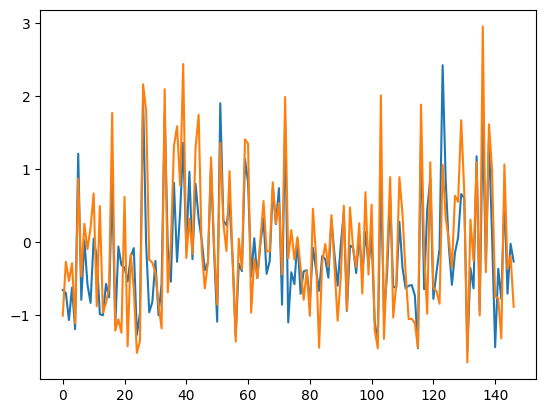

In [187]:
plt.plot(ann.predict(X_test)[::36])
plt.plot(y_test[::36])

In [188]:
sc_y.inverse_transform(y_test)

array([[ 68100.875419],
       [ 84321.367955],
       [ 75303.191799],
       ...,
       [ 90202.164123],
       [138678.206819],
       [ 52018.748047]])

165/165 [==============================] - 0s 610us/step


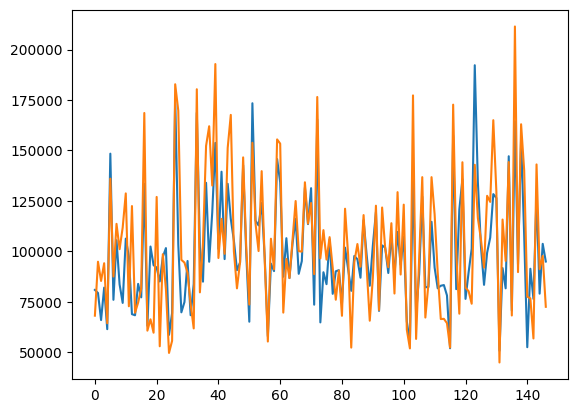

In [190]:
plt.plot(sc_y.inverse_transform(ann.predict(X_test))[::36])
plt.plot(sc_y.inverse_transform(y_test)[::36])